# Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


* CustomerID : the customer ID of the mall. I will drop this because of it's irrelevancy to customer segmentation.
* Gender : the customer gender. I will encode this to numerical value.
* Age : the customer age (years old).
* Annual Income : the customer income divided by 1000 (USD).
* Spending Score : the customer spending score in the mall. In scale of 1 to 100.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No NaN value in the dataframe.

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Analysis

## Gender

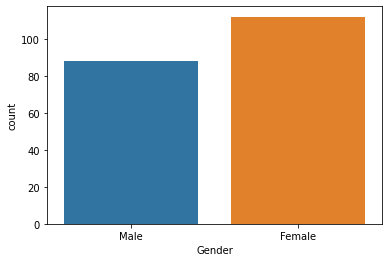

In [6]:
sns.countplot(data['Gender'])

In [7]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

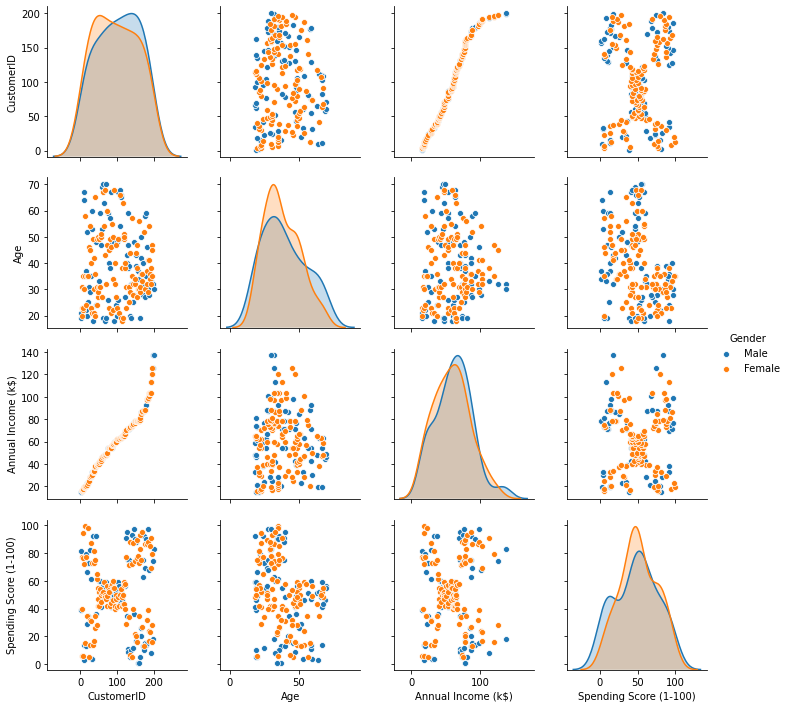

In [8]:
sns.pairplot(data=data, hue='Gender')

Insight:
* More female customers than male customers
* More female customers in their younger age (below 50 years old) but more male customers in their older age (above 50 years old)
* More female customers with annual income below 80000 USD but more male customers with annual income above 80000 USD.
* Male customers spending score tends to be lower than female spending score.

## Age

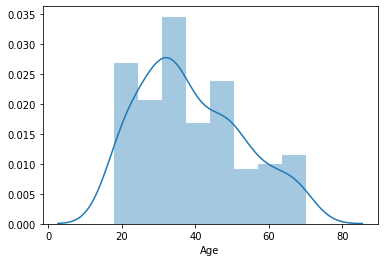

In [9]:
sns.distplot(data['Age'])

Most customers are in their 20s to 50s.There are 3 spikes or big increase in the early 20s, 30s and 50s. I assume that customers in their early 20s are 'young' who tends to spend a lot on fashion and trends, customers in their 30s just start families thus needed more appliances and tools, customers in their 50s are retiring thus tends to spend more from their savings.

## Annual Income

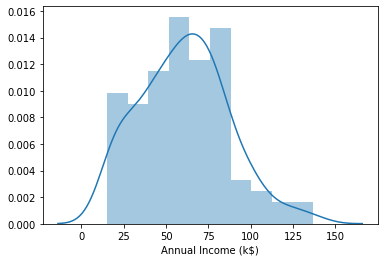

In [10]:
sns.distplot(data['Annual Income (k$)'])

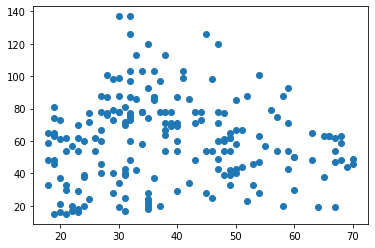

In [11]:
plt.scatter(data["Age"], data["Annual Income (k$)"])

Nothing unusual found in the customers' annual income. We can see that most customers were in full time jobs (income in range of 40000 to 80000 USD). Age also doesn't really affect annual income.

## Spending Score

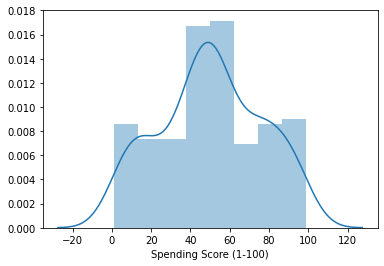

In [12]:
sns.distplot(data['Spending Score (1-100)'])

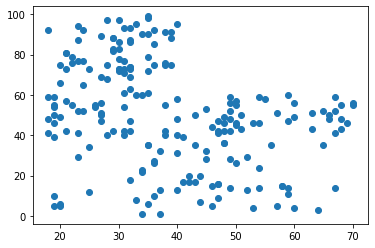

In [13]:
plt.scatter(data["Age"], data["Spending Score (1-100)"])

Most customers spending score are in the middle. Younger customers (in range of 20s to 40 years old) have higher spending score.

## Pre-processing

In [14]:
le = LabelEncoder()
le.fit(data['Gender'].drop_duplicates())
data['Gender'] = le.transform(data['Gender'])

In [15]:
data['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

Female is 0 and Male is 1

In [16]:
df = data.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# K-means Clustering

## Trial

First I'll cluster customer into 3 category with assumption that K-means clustering will divide customer into low, middle and high customers.

In [17]:
km3 = KMeans(n_clusters=3)

In [18]:
cluster3_gender = km3.fit_predict(df)

In [19]:
df['Category'] = cluster3_gender

Text(0, 0.5, 'SpendingScore')

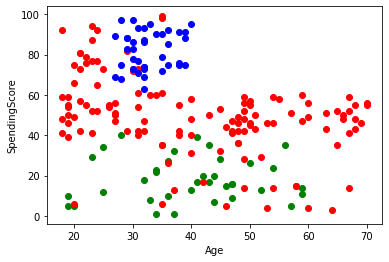

In [20]:
plt.scatter(df[df['Category']==0]['Age'], df[df['Category']==0]['Spending Score (1-100)'], color='green')
plt.scatter(df[df['Category']==1]['Age'], df[df['Category']==1]['Spending Score (1-100)'], color='red')
plt.scatter(df[df['Category']==2]['Age'], df[df['Category']==2]['Spending Score (1-100)'], color='blue')
plt.xlabel('Age')
plt.ylabel('SpendingScore')

My initial assumption:
* Category 0 is low category customer.
* Category 1 is middle category customer.
* Category 2 is high category customer.

Text(0, 0.5, 'SpendingScore')

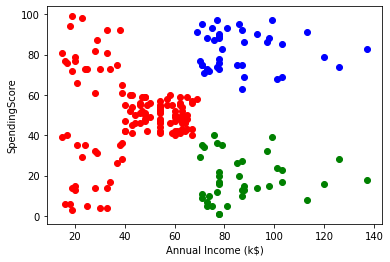

In [21]:
plt.scatter(df[df['Category']==0]['Annual Income (k$)'], df[df['Category']==0]['Spending Score (1-100)'], color='green')
plt.scatter(df[df['Category']==1]['Annual Income (k$)'], df[df['Category']==1]['Spending Score (1-100)'], color='red')
plt.scatter(df[df['Category']==2]['Annual Income (k$)'], df[df['Category']==2]['Spending Score (1-100)'], color='blue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('SpendingScore')

My Second Assumption:
* I can't assume customer category by low, medium and high.
* Category 0 is the customer with higher income (above 70000 USD) but lower spending score (below 40 score)
* Category 1 is the customer with lower income (below 70000 USD) but varied spending score
* Category 2 is the customer with higher income and higher spending score (over 60 score)

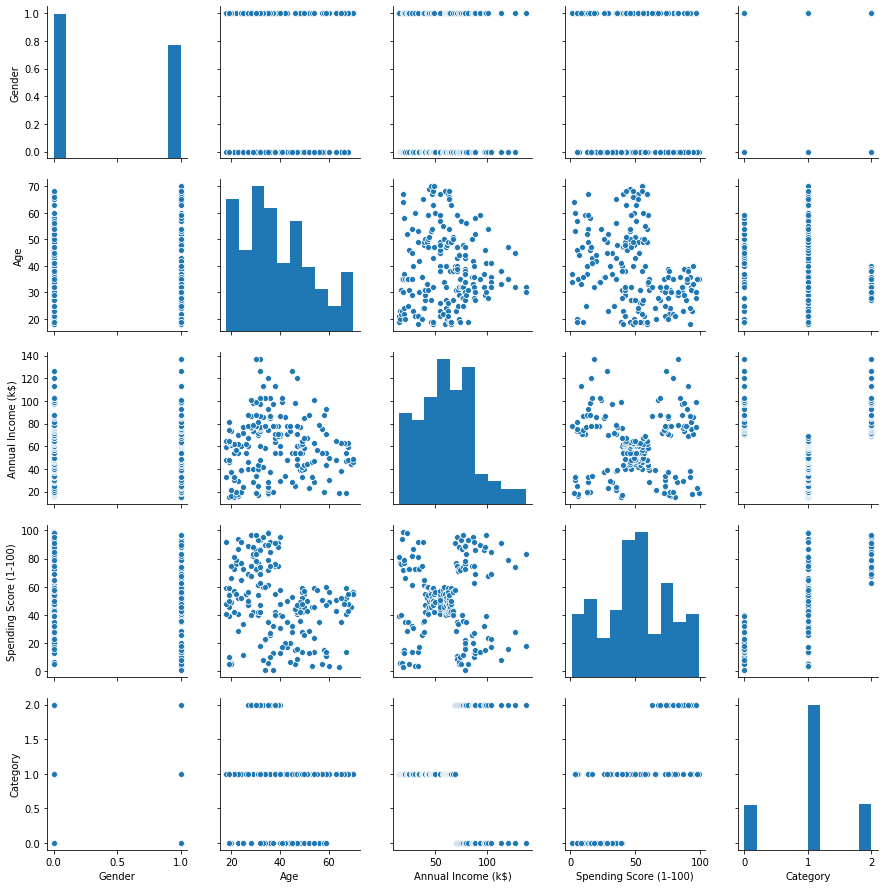

In [37]:
sns.pairplot(data=df)

In [35]:
df[df['Gender'] == 0]['Category'].value_counts()

1    73
2    21
0    18
Name: Category, dtype: int64

In [36]:
df[df['Gender'] == 1]['Category'].value_counts()

1    50
0    20
2    18
Name: Category, dtype: int64

In [38]:
df['Category'].value_counts()

1    123
2     39
0     38
Name: Category, dtype: int64

Conclusion:
* Gender did not affect customer segmentation or clustering
* Category 0: Age is varied, income is above 70000 USD, spending score below 40 and makes 19% of total customers. I call category 0 the picky spenders, one solution to increase their spending score is to give more discounts because based on their income they can buy more.
* Category 1: Age is varied, income is below 70000 USD, their spending score is varied and makes 61.5% of total customers. I call category 1 the average customers, I think there is no need for special priveleges given to this category but all changes need to consider this category of customers.
* Category 2: Age is in range of mid 20s to 40 years old, income is above 70000 USD, their spending score is above 60 and makes 19.5% of total customers. I call this category the big spender, supported by their higher income this type of customers need to be increased so I think the best move here is to add more vendors that this category of customers like and also give incentives to this category to spend more like free bonus if spend above 500 USD.

## Elbow Method

Elbow Method is used to pick the best cluster number based on the best elbow angle.

In [39]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

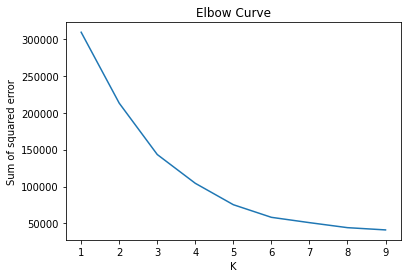

In [40]:
plt.title('Elbow Curve')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(list(range(1,10)), sse)

I think the best elbow angle or number of cluster is 5.

In [41]:
km5 = KMeans(n_clusters=5)

In [42]:
cluster5 = km5.fit_predict(df)

In [47]:
df['Category'] = cluster5

In [49]:
df['Category'] = df['Category'].astype('object')

Text(0, 0.5, 'SpendingScore')

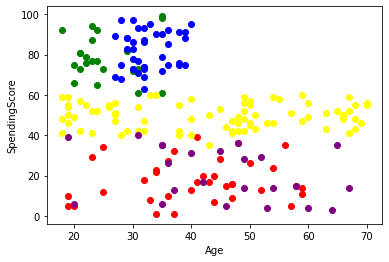

In [51]:
plt.scatter(df[df['Category']==0]['Age'], df[df['Category']==0]['Spending Score (1-100)'], color='green')
plt.scatter(df[df['Category']==1]['Age'], df[df['Category']==1]['Spending Score (1-100)'], color='red')
plt.scatter(df[df['Category']==2]['Age'], df[df['Category']==2]['Spending Score (1-100)'], color='blue')
plt.scatter(df[df['Category']==3]['Age'], df[df['Category']==3]['Spending Score (1-100)'], color='yellow')
plt.scatter(df[df['Category']==4]['Age'], df[df['Category']==4]['Spending Score (1-100)'], color='purple')
plt.xlabel('Age')
plt.ylabel('SpendingScore')

We can't really differentiate category based on age bar category 0 that takes customers younger than mid 30s years old and category 2 that takes customers in range of mid 20s to 40 years old.

Text(0, 0.5, 'SpendingScore')

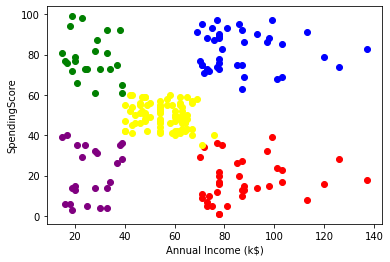

In [56]:
plt.scatter(df[df['Category']==0]['Annual Income (k$)'], df[df['Category']==0]['Spending Score (1-100)'], color='green')
plt.scatter(df[df['Category']==1]['Annual Income (k$)'], df[df['Category']==1]['Spending Score (1-100)'], color='red')
plt.scatter(df[df['Category']==2]['Annual Income (k$)'], df[df['Category']==2]['Spending Score (1-100)'], color='blue')
plt.scatter(df[df['Category']==3]['Annual Income (k$)'], df[df['Category']==3]['Spending Score (1-100)'], color='yellow')
plt.scatter(df[df['Category']==4]['Annual Income (k$)'], df[df['Category']==4]['Spending Score (1-100)'], color='purple')
plt.xlabel('Annual Income (k$)')
plt.ylabel('SpendingScore')

My assumption:
* Category 0 is the low income but high spender
* Category 1 is the high income but low spender
* Category 2 is the high income and high spender
* Category 3 is the middle income and middle spender
* Category 4 is the low income and low spender

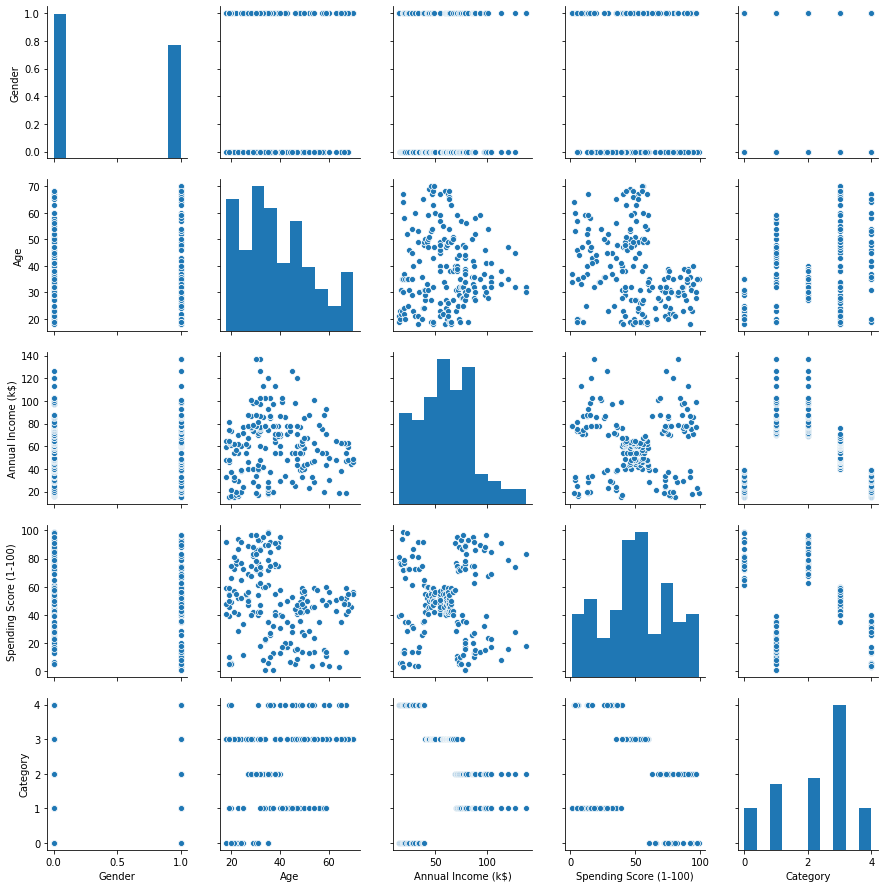

In [54]:
sns.pairplot(data=df)

In [55]:
df['Category'].value_counts()

3    79
2    39
1    36
4    23
0    23
Name: Category, dtype: int64

Conclusion:
* Category 0: Age is below mid 30s, income is below 40000 USD, spending score above 60 and makes 11.5% of total customers. I call category 0 the young excessive spenders. Only 11.5% of total customers from this category perhaps making the mall more modern and cool for the younger generation can increase this category of customers.
* Category 1: Age is varied, income is above 70000 USD, their spending score is below 40 and makes 18% of total customers. I call category 0 the picky spenders, one solution to increase their spending score is to give more discounts because based on their income they can buy more.
* Category 2: Age is in range of mid 20s to 40 years old, income is above 70000 USD, their spending score is above 60 and makes 19.5% of total customers. I call this category the big spender, supported by their higher income this type of customers need to be increased so I think the best move here is to add more vendors that this category of customers like and also give incentives to this category to spend more like free bonus if spend above 500 USD.
* Category 3: Age is varied, income is above 40000 USD but below 70000 USD, spending score is above 40 and below 60 and makes 39.5% of total customers. I call this category the average customer. This category buy their needs from the mall and makes up the bulk of customers. I think this category is the most important because it is the backbone of the mall customers, thus I recommend to keep this category of customers in mind when adding changes to the mall.
* Category 4: Age is varied, income is below 40000 USD, spending score is below 40 and makes 11.5% of total customers. This is the budget spender. This type of customers perhaps is not attractive enough to be increased by the mall.